In [212]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import math as m
import os
import os.path as path

filename = '/home/lirfu/PersonalWorkspace/EvolvingTransferFunctions/sol/noiseless_all_training_256class/ReadActivations/activations.csv'

In [213]:
func_range_min = -5.
func_range_max = 5.
bins = 101

def load_array(file):
    params = None
    data = []
    with open(file, 'r') as f:
        reader = csv.reader(f, delimiter='\t')
        t=True
        for row in reader:
            if t:
                params = list(map(float, row))
                t = False
            else:
                data.append(list(map(int,row)))
                
    global func_range_min
    global func_range_max
    global bins
    func_range_min = params[0]
    func_range_max = params[1]
    bins = params[2]
    
    return np.array(data)

def normalize(data):
    return data / np.max(data, axis=1)[:,None]

def draw_data(data, f, f_d):
    layers = data.shape[0]
    bins = data.shape[1]
    
    spltx = min(2, layers)
    splty = m.ceil(layers / spltx)

    plt.figure(figsize=(15,5))
    for l in range(layers):
        plt.subplot(splty, spltx, l+1)
        
        x = np.linspace(func_range_min, func_range_max, (func_range_max-func_range_min)*100)
        y = [f(v) for v in x]
        y_d = [f_d(v) for v in x]
        mi = min(min(y), min(y_d))
        
        plt.fill_between([func_range_min + a * (func_range_max-func_range_min)/bins for a in range(bins)],
                         [mi]*bins,
                         data[l,:]+mi, 
                         color='0.7')
        #plt.plot(x, y_d, 'r', linewidth=1)
        plt.plot(x, y, 'b')
        plt.title('Skriveni sloj ' + str(l + 1))
        
def store_img(filename):
    dirname = path.dirname(filename)
    plt.savefig(os.path.join(dirname, 'activations.pdf'), bbox='tight')

/home/lirfu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


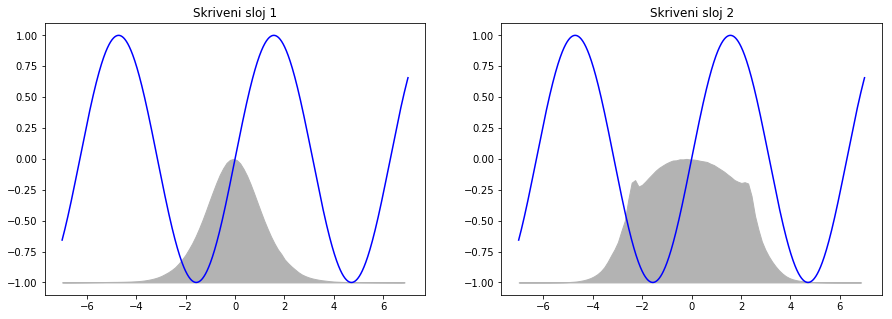

In [215]:
data = load_array(filename)
data = normalize(data)
draw_data(data, m.sin, m.cos)
store_img(filename)
plt.show()